### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/csv/processed_data_with_new_features.csv', index_col='id')

In [ ]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [ ]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here
for col in data.columns:
  s = data[col].isna().sum()
  p = data[col].isna().mean()
  print(f"{col} - {s} - {round(p,3)}%")

vendor_id - 0 - 0.0%
passenger_count - 145864 - 0.1%
store_and_fwd_flag - 0 - 0.0%
distance_km - 145864 - 0.1%
log_trip_duration - 0 - 0.0%
anomaly - 0 - 0.0%
traffic_jam - 0 - 0.0%
day_of_week_1 - 0 - 0.0%
day_of_week_2 - 0 - 0.0%
day_of_week_3 - 0 - 0.0%
day_of_week_4 - 0 - 0.0%
day_of_week_5 - 0 - 0.0%
day_of_week_6 - 0 - 0.0%
hour_1 - 0 - 0.0%
hour_2 - 0 - 0.0%
hour_3 - 0 - 0.0%
hour_4 - 0 - 0.0%
hour_5 - 0 - 0.0%
hour_6 - 0 - 0.0%
hour_7 - 0 - 0.0%
hour_8 - 0 - 0.0%
hour_9 - 0 - 0.0%
hour_10 - 0 - 0.0%
hour_11 - 0 - 0.0%
hour_12 - 0 - 0.0%
hour_13 - 0 - 0.0%
hour_14 - 0 - 0.0%
hour_15 - 0 - 0.0%
hour_16 - 0 - 0.0%
hour_17 - 0 - 0.0%
hour_18 - 0 - 0.0%
hour_19 - 0 - 0.0%
hour_20 - 0 - 0.0%
hour_21 - 0 - 0.0%
hour_22 - 0 - 0.0%
hour_23 - 0 - 0.0%
month_2 - 0 - 0.0%
month_3 - 0 - 0.0%
month_4 - 0 - 0.0%
month_5 - 0 - 0.0%
month_6 - 0 - 0.0%


In [ ]:
data["passenger_count"].value_counts()

930.399753     930354
1005.458335    189262
1070.232174     70348
1028.236276     53751
1061.355223     43460
1053.529749     25543
1718.433333        57
19.666667           3
560.000000          1
104.000000          1
Name: passenger_count, dtype: int64

In [ ]:
data["passenger_count"] = data["passenger_count"].fillna(930.399753)

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [ ]:
### Your code is here

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [ ]:
### Your code is here

In [ ]:
col_for_mean = ["vendor_id","store_and_fwd_flag","traffic_jam","month_2","month_3","month_4","month_5","month_6"]

In [ ]:
data[col_for_mean]

,vendor_id,store_and_fwd_flag,traffic_jam,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,
id2875421,1,0,0,0,1,0,0,0
id2377394,0,0,0,0,0,0,0,1
id3858529,1,0,1,0,0,0,0,0
id3504673,1,0,0,0,0,1,0,0
id2181028,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
id2376096,1,0,0,0,0,1,0,0
id1049543,0,0,0,0,0,0,0,0
id2304944,1,0,0,0,0,1,0,0


In [ ]:
### Убедимся, что пропусков не осталось

### Your code is here
mean_for_group = data.groupby(col_for_mean).mean()


In [ ]:
mean_for_group = mean_for_group[["distance_km"]].reset_index().rename(columns = {"distance_km":"mean_for_group"})

In [ ]:
data = data.merge(mean_for_group,how = "left",on = col_for_mean)

In [ ]:
data.loc[(data["distance_km"].isna()),"distance_km"] = data["mean_for_group"]

In [ ]:
data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6,mean_for_group
0,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3.466395
1,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.463570
2,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.183494
3,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3.468311
4,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3.466395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,930.399753,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.468311
1458640,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.323767
1458641,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.468311
1458642,0,930.399753,0,1.093786,5.924256,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.323767


In [ ]:
data = data.drop(columns = ["mean_for_group"])

In [ ]:
data.head(20).to_csv("answer.csv",sep = ";",index=False)

In [ ]:
x = data.drop(columns = ["log_trip_duration"])
y = data["log_trip_duration"]

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [ ]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = LinearRegression()
cros  = cross_validate(model,x,y,
                       cv = selector,
                       scoring = 'neg_mean_squared_error',
                       return_train_score= True)
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cros['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cros['test_score']).round(3)}")
#print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

Среднее MSLE на тренировочных фолдах: 0.43
Среднее MSLE на тестовых фолдах: 0.431


TypeError: ignored

### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa7a4371c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa7a42fa6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa7a4371650>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa7a43001d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa7a4300710>],
 'means': []}

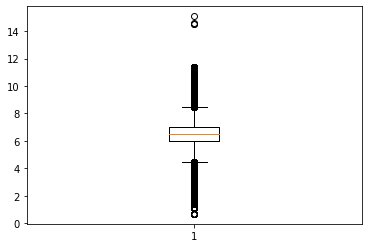

In [ ]:
import matplotlib.pyplot as plt

### Your code is here
plt.boxplot(data["log_trip_duration"])


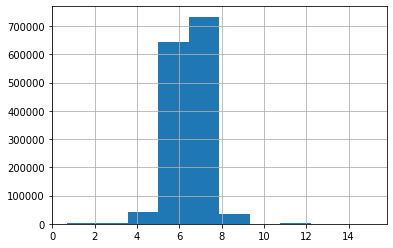

In [ ]:
data["log_trip_duration"].hist()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив не объекты, таргеты которых находятся вне промежутка

[топ 99,5% значение;   топ 0,5% значение]

In [ ]:
top_q = data["log_trip_duration"].quantile(0.995)
low_q = data["log_trip_duration"].quantile(0.005)

In [ ]:
print(top_q)
print(low_q)

8.32845106681936
3.9318256327243257


In [ ]:
data = data[
    (data["log_trip_duration"] < top_q) & (data["log_trip_duration"] > low_q)
    ]

Снова замерьте качество на кросс-валидации, используя старый selector

In [ ]:
x = data.drop(columns = ["log_trip_duration"])
y = data["log_trip_duration"]


In [ ]:
cros  = cross_validate(model,x,y,
                       cv = selector,
                       scoring = 'neg_mean_squared_error',
                       return_train_score= True)
print(f"Среднее MSLE на тренировочных фолдах: {-np.mean(cros['train_score']).round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {-np.mean(cros['test_score']).round(3)}")

Среднее MSLE на тренировочных фолдах: 0.338
Среднее MSLE на тестовых фолдах: 0.35
